# Análise exploratória de dados 
### Problema: Produtividade da industria textil

Quando se trata de analisar dados para gerar insights que ajudem aos tomadores de decisão em um negócio, ou criar modelos de previsão. Uma das fases mais importantes é fazer uma boa análise exploratória dos dados brutos; antes de fazer qualquer tratamento ou "limpeza". Isso é essencial para entender a estrutura e relações entre as variáveis do problema.

Como exemplo temos este conjunto de dados que inclui atributos importantes do processo de fabricação de roupas e da produtividade dos funcionários, que foram coletados manualmente e também validados por especialistas do setor.

Informação das variáveis:
* 1 data: Data em MM-DD-AAAA

* 2 dias: dia da semana

* 3 trimestre: uma parte do mês. Um mês foi dividido em quatro trimestres

* 4 Departamento: Departamento associado à instância

* 5 nº da equipe: número da equipe associada à instância

* 6 n° de Trabalhadores: Número de trabalhadores em cada equipe

* 7 n° de mudanças: Número de mudanças no estilo de um determinado produto

* 8 produtividade alvo: produtividade alvo definida pela Autoridade para cada equipa em cada dia.

* 9 smv: Valor padrão por minuto, é o tempo alocado para uma tarefa

* 10 wip: Trabalho em andamento. Inclui o número de itens não acabados para produtos

* 11 horas extras: Representa a quantidade de horas extras de cada equipe em minutos

* 12 incentivo: Representa a quantidade de incentivo financeiro (no BDT) que permite ou motiva um determinado curso de ação.

* 13 interrupção: A quantidade de tempo em que a produção foi interrompida devido a vários motivos

* 14 ociosos: O número de trabalhadores que ficaram ociosos devido à interrupção da produção

* 15 produtividade atual: a real de produtividade que foi entregue pelos trabalhadores. Ele varia de 0-1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

## Tratamento de outliers

“Um outlier é uma observação que se diferencia tanto das demais observações que levanta suspeitas de que aquela observação foi gerada por um mecanismo distinto” (Hawkins, 1980), em outras palavras os outliers são dados que se distanciam radicalmente de todos os outros São pontos fora da curva normal, valores que fogem da normalidade e que podem causar desequilíbrio nos resultados obtidos. Um conjunto de dados pode apresentar um ou vários outliers. O efeito de um outlier é quase um efeito borboleta, um pequeno erro se propaga e quando não tratado corretamente pode ocasionar problemas e anomalias. Em análises estatísticas o efeito do outlier pode ser facilmente observado.

Uma regra bastante usada afirma que um dado é um outlier quando ele é maior que $1{,}5\cdot\text{IQR}$ acima do terceiro quartil ou abaixo do primeiro quartil. Em outras palavras, outliers baixos estão abaixo de $\text{Q}_1-1{,}5\cdot\text{IQR}$ e outliers altos estão acima de $\text{Q}_3+1{,}5\cdot\text{IQR}$. 

In [2]:
def iqr(x):
    return x.quantile(q=0.75) - x.quantile(q=0.25)

# outlier > 75% +1.5IQR e < 25% -1.5IQR
def outlier_count(x):
    upper_out = x.quantile(q=0.75) + 1.5* iqr(x)
    lower_out = x.quantile(q=0.25) - 1.5* iqr(x)
    
    return len(x[x > upper_out]) + len(x[x < lower_out])

def remove_outlier(x):
    upper_out = x.quantile(q=0.75) + 1.5* iqr(x)
    lower_out = x.quantile(q=0.25) - 1.5* iqr(x)
    
    return x[(x <= upper_out) & (x >= lower_out)]

## análise univariada

Verifica o comportamento de cada variável isoladamente. A **UnivariatePlot_util** abaixo define metódos que plotam os gráficos para analisar este comportamento com e sem os outliers. Já a funcão **df_information** mostra a estrutura dos dados.

In [3]:
class UnivariatePlot_util(object):
    
    def __init__(self, x):
        self.x = x
        
    def var_plot(self):
        bins = max(round(self.x.nunique()/100), min(self.x.nunique(), 10))
        ax = sns.distplot(self.x, kde=True, hist=True, bins=bins, rug=False, color='C3')
        plt.xticks(rotation=45)
        #plt.show
    
    #gráfico sem outlier
    def outlier_var_plot(self):
        x = remove_outlier(self.x)
        bins = max(round(self.x.nunique()/100), min(self.x.nunique(), 10))
        ax = sns.distplot(self.x, kde=True, hist=True, bins=bins, rug=False, color='C4')
        plt.xticks(rotation=45)
        #plt.show
    
    def cat_plot(self):
        plt.hist(self.x)
        plt.xticks(rotation=90)
        #plt.show
                   
    def distribuition_plot(self):
        if self.x.dtypes == 'object' or self.x.dtypes == 'bool':
                   self.cat_plot()
        else:
            self.outlier_var_plot()   
            
    def outlier_distribuition_plot(self):
        if self.x.dtypes == 'object' or self.x.dtypes == 'bool':
                   self.cat_plot()
        else:
            self.outlier_var_plot() 

In [4]:
### Informações sobre os dados
def df_information(df, id_cols):
    
    #mover id_cols
    df.drop(columns=id_cols)
    #dataframe vazio
    data_info = pd.DataFrame(np.random.randn(0, 12)* 0, 
                         columns=[ 'Num. de Observações',
                                   'Num. de Variáveis',
                                   'Num. Váriáveis numéricas',
                                   'Num. Variáveis de fator',
                                   'Num. Variáveis categoricas',
                                   'Num. Variáveis lógicas',
                                   'Num. Variáveis de data',
                                   'Num. Variáveis com variância zero (uniforme)',
                                   '% de variáveis com valores missing = 0%',
                                   '% de variáveis com valores missing <= 50%',
                                   '% de variáveis com valores missing > 50%',
                                   '% de variáveis com valores missing > 90%'])
    
    # informações dos dados
    data_info.loc[0, 'Num. de Observações'] = df.shape[0]
    data_info.loc[0, 'Num. de Variáveis'] = df.shape[1]
    data_info.loc[0, 'Num. Váriáveis numéricas'] = df.select_dtypes(include=np.number).shape[1]
    data_info.loc[0, 'Num. Variáveis de fator'] = df.select_dtypes(include='category').shape[1]
    data_info.loc[0, 'Num. Variáveis categoricas'] = df.select_dtypes(include='object').shape[1]
    data_info.loc[0, 'Num. Variáveis de data'] = df.select_dtypes(include='datetime64').shape[1]
    data_info.loc[0, 'Num. Variáveis com variância zero (uniforme)'] = df.loc[:, df.apply(pd.Series.nunique)== 1].shape[1]
    
    null_per = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_per.columns = ['null_per']
    
    data_info.loc[0, '% de variáveis com valores missing = 0%'] = null_per[null_per['null_per'] == 0].shape[0]* 100 / df.shape[1]
    data_info.loc[0, '% de variáveis com valores missing <= 50%'] = null_per[null_per['null_per'] <= 0.5].shape[0]* 100 / df.shape[1]
    data_info.loc[0, '% de variáveis com valores missing > 50%'] = null_per[null_per['null_per'] > 0.5].shape[0]* 100 / df.shape[1]
    data_info.loc[0, '% de variáveis com valores missing > 90%'] = null_per[null_per['null_per'] > 0.9].shape[0]* 100 / df.shape[1]
    
    #coloca os dados em formato de tabela
    data_info = data_info.transpose()
    data_info.columns = ['valor']
    data_info.fillna(0, inplace=True)
    data_info['valor'] = data_info['valor'].astype(int)
    
    return data_info

## Dados

In [7]:
columns = {"date":"data","quarter":"trimestre","department":"departamento","day":"dias", "team":"nº da equipe",
           "targeted_productivity":"produtividade alvo","smv":"smv", "wip":"wip", "over_time":"horas extras",
           "incentive":"incentivo","idle_time":"interrupção", "idle_men":"ociosos",
           "no_of_style_change":"n° de mudanças", "no_of_workers":"n°de trabalhadores",
           "actual_productivity": "produtividade atual"}
df = pd.read_csv('./data/garments_worker_productivity.csv')
df.rename(columns=columns, inplace=True)
df.head()

,data,trimestre,departamento,dias,nº da equipe,produtividade alvo,smv,wip,horas extras,incentivo,interrupção,ociosos,n° de mudanças,n°de trabalhadores,produtividade atual
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [9]:
id_cols = ['data']
df_information(df=df, id_cols=id_cols)

,valor
Num. de Observações,1197
Num. de Variáveis,15
Num. Váriáveis numéricas,11
Num. Variáveis de fator,0
Num. Variáveis categoricas,4
Num. Variáveis lógicas,0
Num. Variáveis de data,0
Num. Variáveis com variância zero (uniforme),0
% de variáveis com valores missing = 0%,93
% de variáveis com valores missing <= 50%,100


### Estatísticas da produtividade

In [11]:
df['produtividade atual'].describe()

count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: produtividade atual, dtype: float64

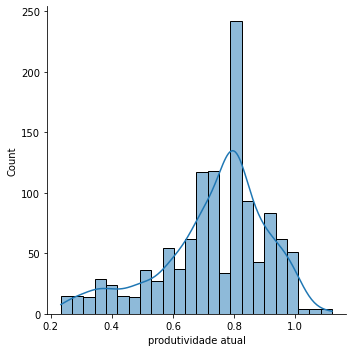

In [12]:
sns.displot(df['produtividade atual'], kde=True)

In [13]:
# assimetria 
print('Assimetria: %1.1f' % df['produtividade atual'].skew())
print('Curtose: %1.1f' % df['produtividade atual'].kurt())

Assimetria: -0.8
Curtose: 0.3


A produtividade tem distríbuição muito proxíma da normal apresentando apenas uma assimetria moderada para a curtose descreve o pico da distribuição. É a nitidez do pico de uma curva de distribuição de frequência. Na verdade, é a medida dos outliers presentes na distribuição:
* Alta curtose em um conjunto de dados é um indicador de que os dados têm outliers pesados.
* Baixa curtose em um conjunto de dados é um indicador de que os dados não apresentam valores discrepantes.

Junto com a assimetria, a curtose é uma estatística descritiva importante da distribuição de dados. No entanto, os dois conceitos não devem ser confundidos. A assimetria mede essencialmente a simetria da distribuição, enquanto a curtose determina o peso das caudas da distribuição.

### Resumo das váriáveis númericas

In [14]:
def num_sumary(df, id_cols):
    
    df_num = df.drop(columns=id_cols).select_dtypes(include=np.number)
    columns = ['Valores negativos','Valores positivos', 
                'Valores iguais a zero', 'Valores únicos', 
                'Valores negativo infinito',
                'Valores positivo infinito',
                'Valores missing',
                'Outliers']
    index = df_num.columns
    
    data_info_num = pd.DataFrame(columns=columns, index=index)
    
    
    # Contagem das estatísticas
    for c in df_num.columns:
            data_info_num.loc[c, 'Valores negativos'] = df_num[df_num[c] < 0].shape[0]
            data_info_num.loc[c, 'Valores positivos'] = df_num[df_num[c] > 0].shape[0]
            data_info_num.loc[c, 'Valores iguais a zero'] = df_num[df_num[c] == 0].shape[0]
            data_info_num.loc[c, 'Valores únicos'] = len(df_num[c].unique())
            data_info_num.loc[c, 'Valores negativo infinito'] = df_num[df_num[c] == -np.inf].shape[0]
            data_info_num.loc[c, 'Valores positivo infinito'] = df_num[df_num[c] == np.inf].shape[0]
            data_info_num.loc[c, 'Valores missing'] = df_num[df_num[c].isnull()].shape[0]
            data_info_num.loc[c, 'Outliers'] = outlier_count(df_num[c])
            
    
    
    print('outlier > 75% +.5IQR e < 25% -1.5IQR')
    
    return data_info_num

In [16]:
num_sumary(df, ['data'])

outlier > 75% +.5IQR e < 25% -1.5IQR


,Valores negativos,Valores positivos,Valores iguais a zero,Valores únicos,Valores negativo infinito,Valores positivo infinito,Valores missing,Outliers
nº da equipe,0,1197,0,12,0,0,0,0
produtividade alvo,0,1197,0,9,0,0,0,79
smv,0,1197,0,70,0,0,0,0
wip,0,691,0,549,0,0,506,22
horas extras,0,1166,31,143,0,0,0,1
incentivo,0,593,604,48,0,0,0,11
interrupção,0,18,1179,12,0,0,0,18
ociosos,0,18,1179,10,0,0,0,18
n° de mudanças,0,147,1050,3,0,0,0,147
n°de trabalhadores,0,1197,0,61,0,0,0,0


### Resumo das váriáveis categóricas

In [34]:
def cat_sumary(df, id_cols):
    
    df_cat = df.drop(columns=id_cols).select_dtypes(include=['object', 'bool'])
    
    columns = ['valores únicos', 'valores missing']
    index = df_cat.columns
    
    df_cat_info = pd.DataFrame(columns=columns, index=index)
    
     # Contagem das estatísticas
    for c in df_cat.columns:
        df_cat_info.loc[c, 'valores únicos'] = len(df_cat[c].unique())
        df_cat_info.loc[c, 'valores missing'] = df_cat[df_cat[c].isnull()].shape[0]
    
    df_cat_info.fillna(0, inplace=True)   
    return df_cat_info

In [35]:
cat_sumary(df, ['data'])

,valores únicos,valores missing
trimestre,5,0
departamento,3,0
dias,6,0


### Resumo estatístico das váriáveis númericas

In [20]:
def stats_num(df, id_cols):
    
    df_num = df.drop(columns=id_cols).select_dtypes(include=np.number)
    
    df_stats_num = pd.DataFrame()
    
    df_stats_num = pd.concat([df_num.describe().transpose(),
                             pd.DataFrame(df_num.quantile(q=0.10)),
                             pd.DataFrame(df_num.quantile(q=0.90)),
                             pd.DataFrame(df_num.quantile(q=0.95))], axis=1)
    
    df_stats_num.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', '10%', '90%', '95%']
    
    return df_stats_num

In [22]:
stats_num(df, ['data'])

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
nº da equipe,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000,2.000000,11.000000,12.000000
produtividade alvo,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000,0.600000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000,3.900000,29.400000,30.100000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000,532.000000,1484.000000,1602.000000
horas extras,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000,960.000000,10170.000000,10368.000000
incentivo,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000,0.000000,63.000000,88.000000
interrupção,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000
ociosos,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000
n° de mudanças,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000
n°de trabalhadores,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000,8.000000,58.000000,59.000000


### visualizações univariadas das variáveis

In [23]:
class UnivariatePlot(object):
    
    def __init__(self, df, id_cols):
        
        self.df = df
        self.id_cols = id_cols
        
    def density_plot(self):
        
        d = self.df.drop(columns=self.id_cols)
        
        for col in d.columns:
            print(col)
            UnivariatePlot_util(d[d[col].notnull()][col]).distribuition_plot()
            plt.xlabel(col)
            plt.ylabel('count')
            plt.show()
            
    def outlier_density_plot(self):
        
        d = self.df.drop(columns=self.id_cols)
        
        for col in d.columns:
            print(col)
            UnivariatePlot_util(d[d[col].notnull()][col]).outlier_distribuition_plot()
            plt.xlabel(col)
            plt.ylabel('count')
            plt.show()
            
    def box_plot(self):
        
        cols = self.df.drop(columns=self.id_cols).select_dtypes(include=np.number).columns
        
        for col in cols:
            sns.boxplot(x=self.df[self.df[col].notnull()][col], orient='v')
            plt.xlabel(col)
            plt.ylabel('values')
            plt.show()
            
    def outlier_box_plot(self):
        
        cols = self.df.drop(columns=self.id_cols).select_dtypes(include=np.number).columns
        
        for col in cols:
            x = remove_outlier(self.df[self.df[col].notnull()][col])
            sns. boxplot(x=x, orient='v')
            plt.xlabel(col)
            plt.ylabel('values')
            plt.show()

trimestre


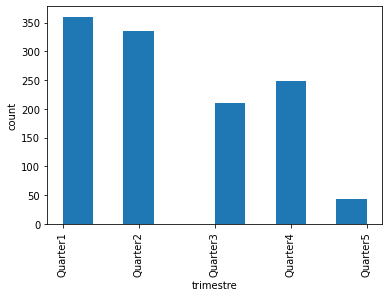

departamento


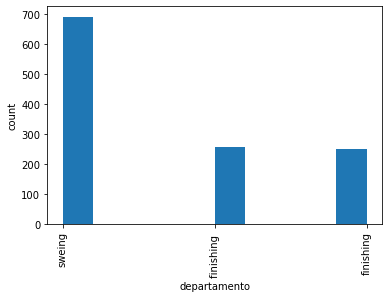

dias


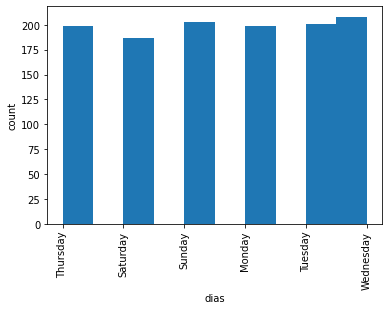

nº da equipe


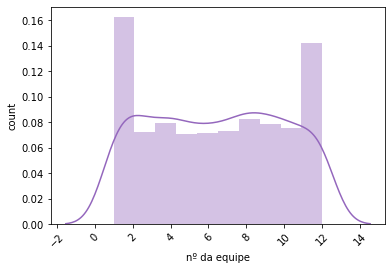

produtividade alvo


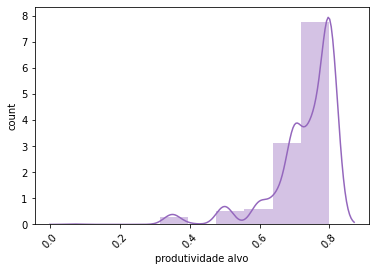

smv


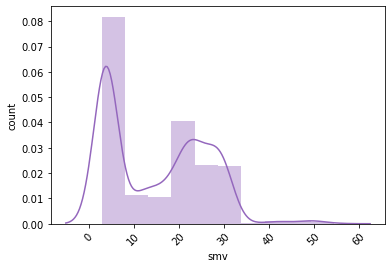

wip


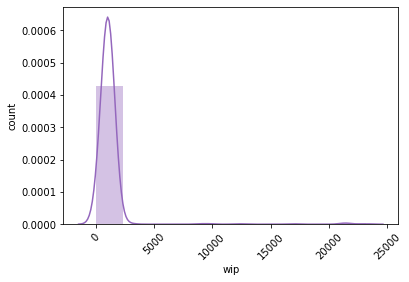

horas extras


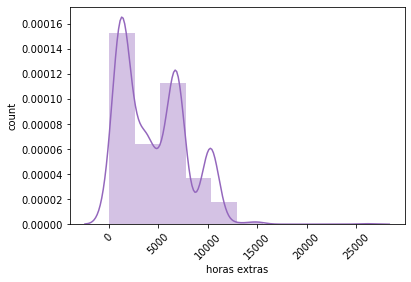

incentivo


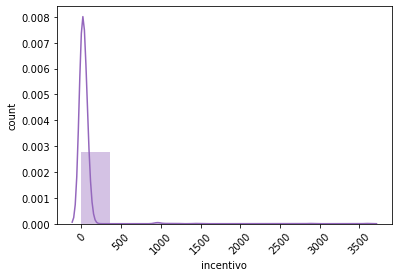

interrupção


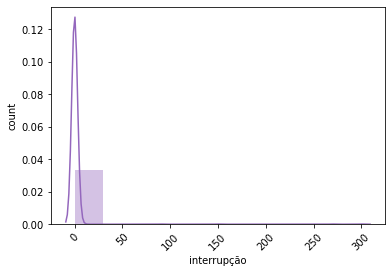

ociosos


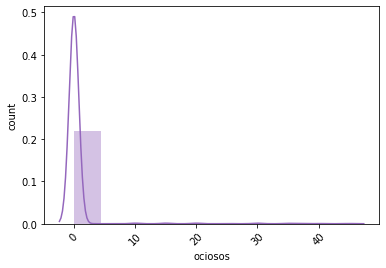

n° de mudanças


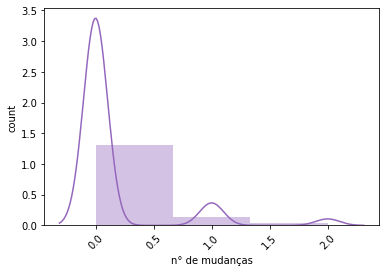

n°de trabalhadores


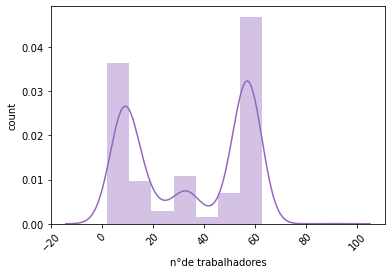

produtividade atual


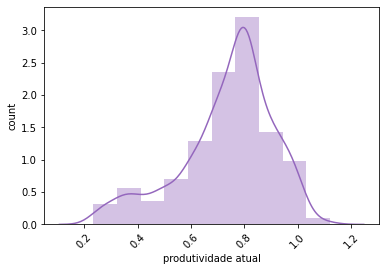

In [24]:
UnivariatePlot(df, ['data']).density_plot()

trimestre


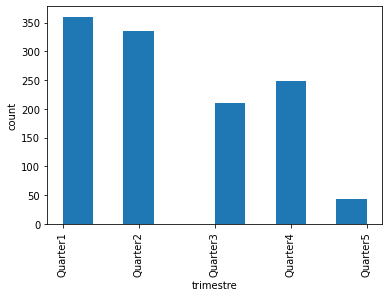

departamento


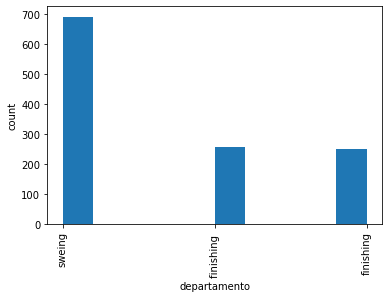

dias


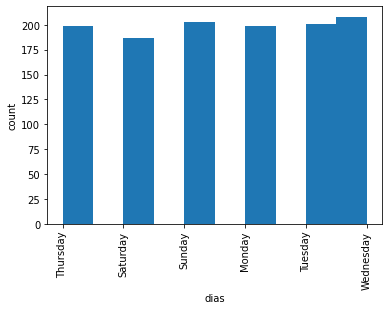

nº da equipe


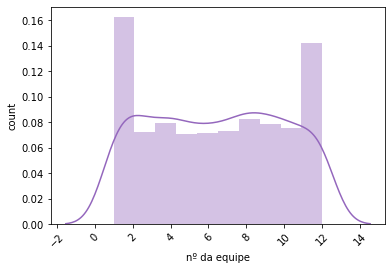

produtividade alvo


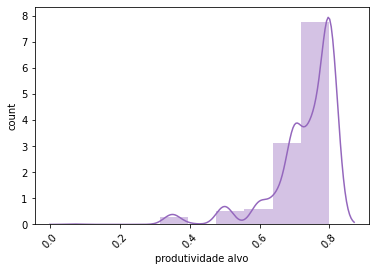

smv


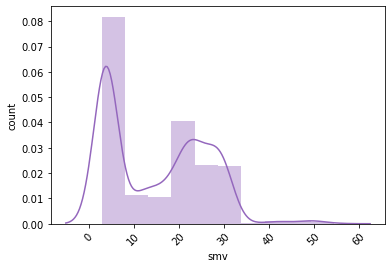

wip


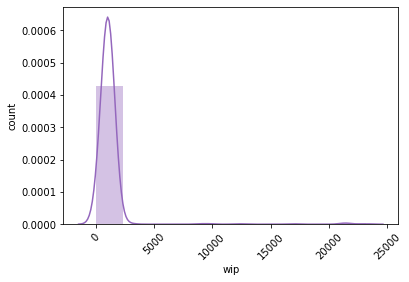

horas extras


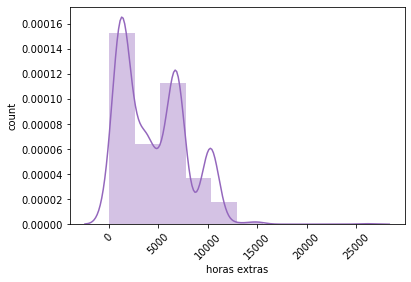

incentivo


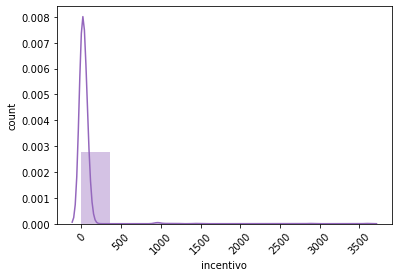

interrupção


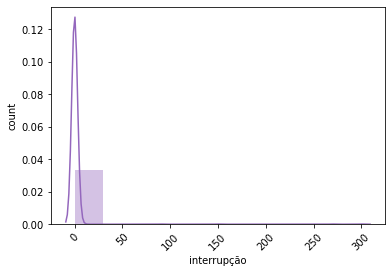

ociosos


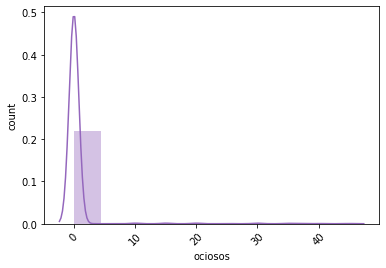

n° de mudanças


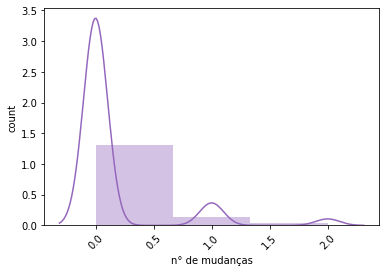

n°de trabalhadores


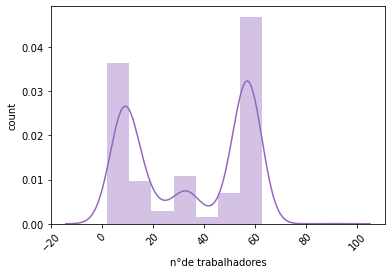

produtividade atual


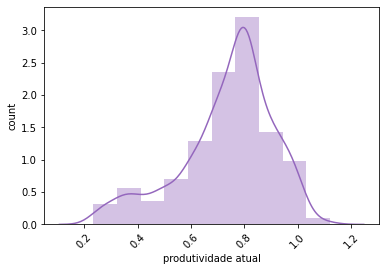

In [26]:
UnivariatePlot(df, ['data']).outlier_density_plot()

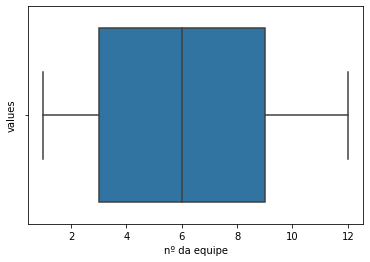

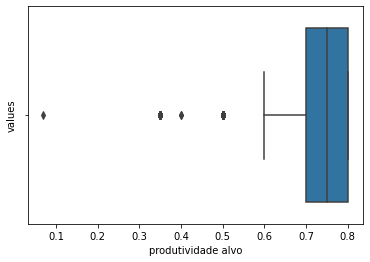

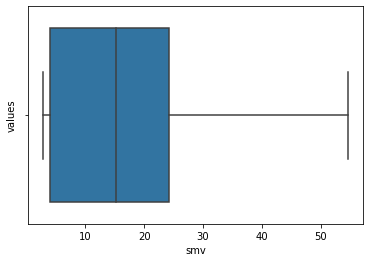

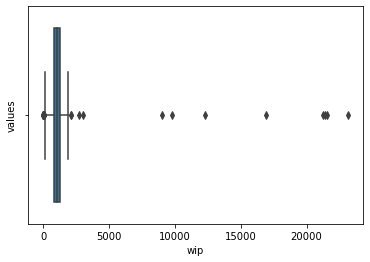

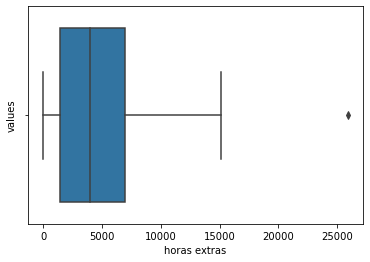

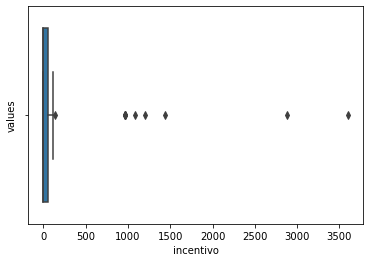

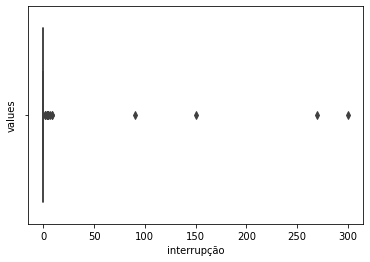

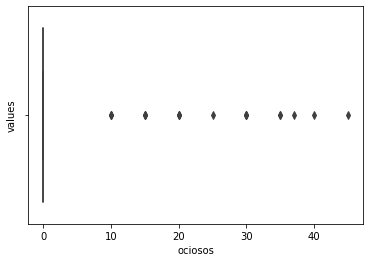

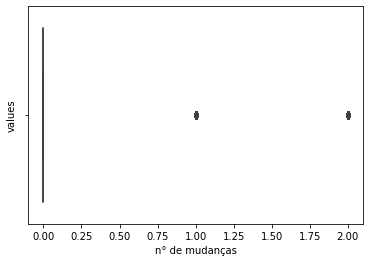

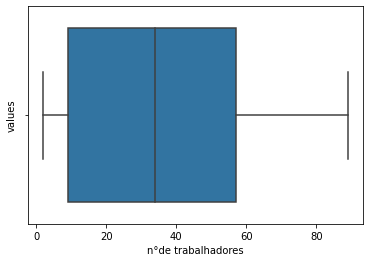

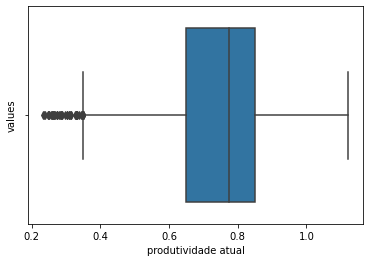

In [27]:
UnivariatePlot(df, ['data']).box_plot()

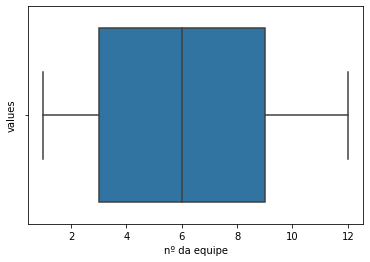

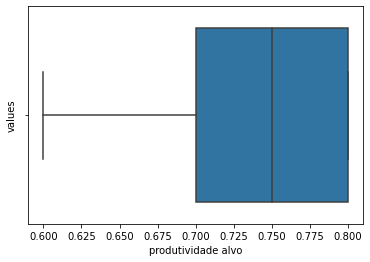

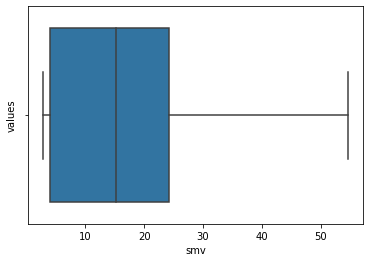

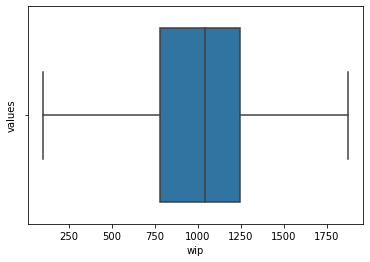

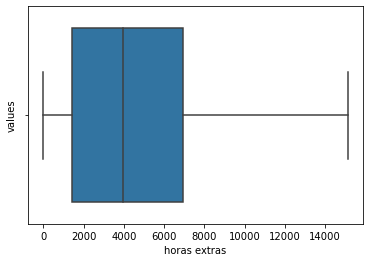

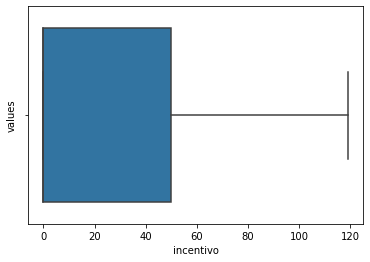

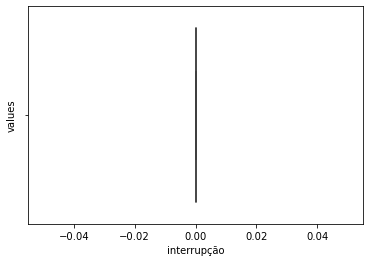

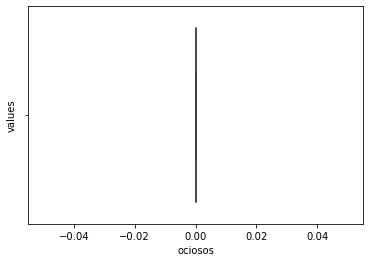

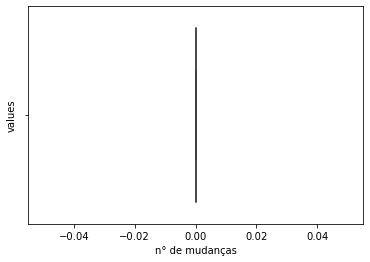

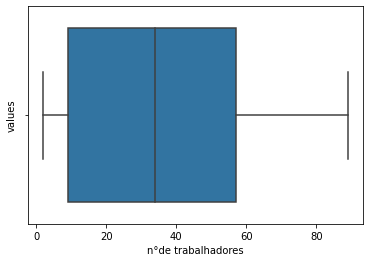

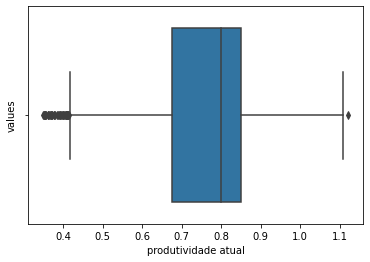

In [28]:
UnivariatePlot(df, ['data']).outlier_box_plot()

Comparando os gráficos de distríbuição com os boxplots fica evidente que algumas variáveis tem valores mais uniformes e distribuídos de forma suave em torno da média, já outras tem valores concentrados em uma estreita faixa e uns poucos valores em  extremos um indicativo de outliers que podem inviesar insights ou modelos de previsão ou classificação.

## Análise bivariada

#### Variáveis númericas

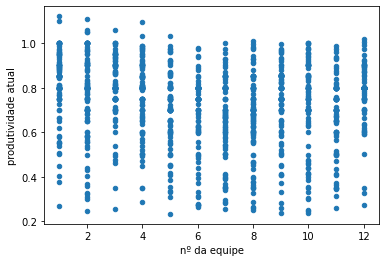

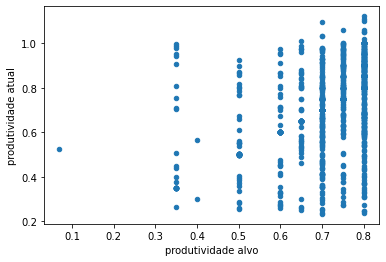

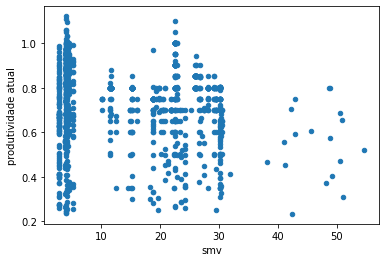

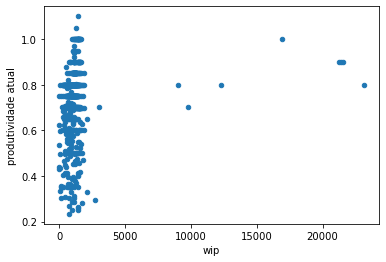

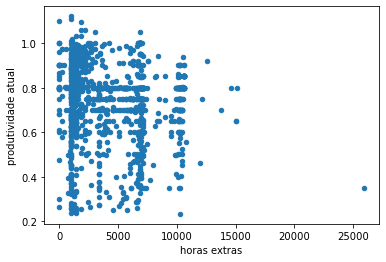

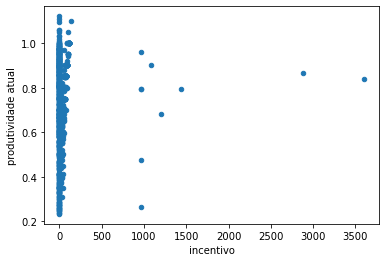

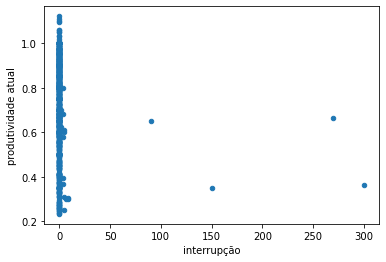

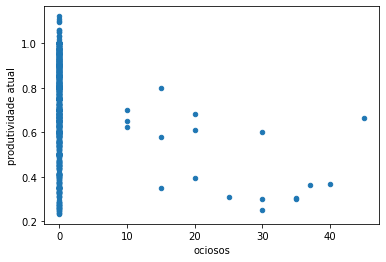

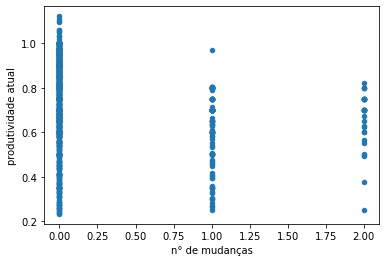

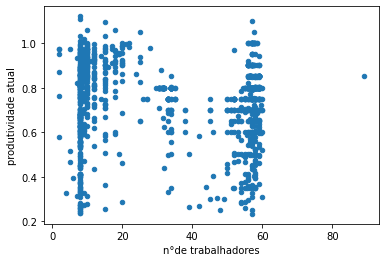

In [29]:
for var in df.drop(columns='produtividade atual').select_dtypes(include=np.number):
    
    data = pd.concat([df['produtividade atual'], df[var]], axis=1)
    data.plot.scatter(x=var, y='produtividade atual')

Scatter plot é usado para verificar se existe uma relação entre causa e efeito entre duas variáveis numéricas.

Isso não significa que uma variável causa efeito na outra, mas apenas se existe uma relação e qual intensidade entre essa relação. A relação entre duas variáveis pode ser positiva, negativa ou neutra, linear ou não linear.

#### Variáveis categóricas

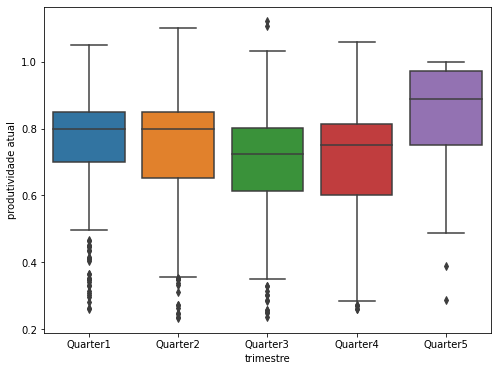

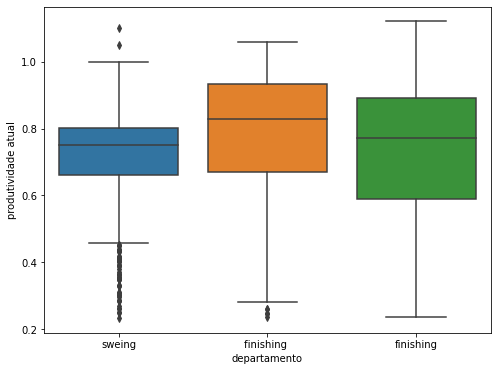

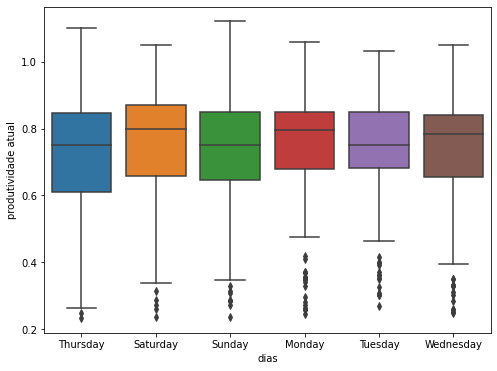

In [31]:
for var in df.drop(columns=['data','produtividade atual']).select_dtypes(include='object'):
    
    data = pd.concat([df['produtividade atual'], df[var]], axis=1)
    fig, ax = plt.subplots(figsize=(8,6))
    fig = sns.boxplot(x= var, y='produtividade atual', data=data)

Os boxplots mostram a distríbuição da produtividade por semestre, departamento e dia da semana, por eles é possível perceber os períodos mais produtivos o setor mais produtivo e, onde varia mais ou é mais constante.

### Matriz de correlação

Os scatterplots não deixam claro a relação entre a produtividade e as outras variáveis, possivelmente por que a variação de uma influencia pouco a outra, para confirmar a melhor maneira é calcular a matriz de correlação.

<AxesSubplot:>

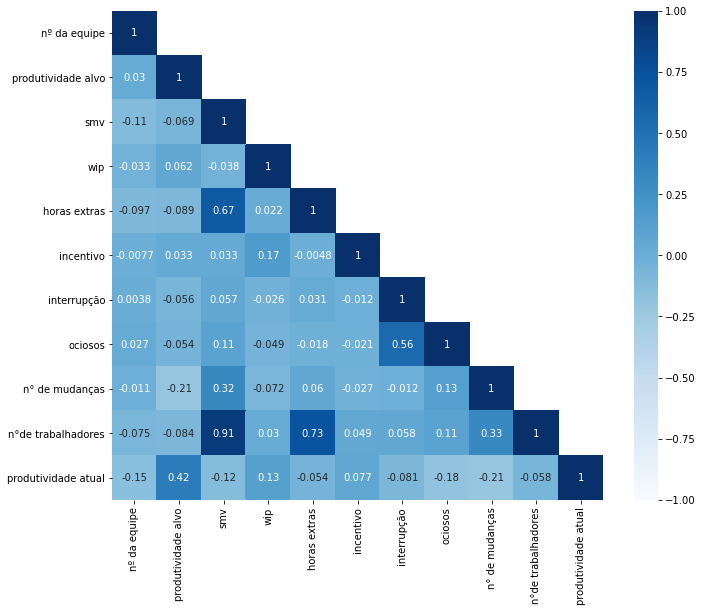

In [33]:
corr_num = df.select_dtypes(include=np.number).corr()
#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

#Gere uma máscara para o triângulo superior
mask = np.triu(corr_num,1)

sns.heatmap(corr_num, mask=mask, cmap='Blues', annot=True, vmin=-1, vmax=1, center= 0)

Com o valor real da correlação, verifica-se que algumas variáveis tem pouca influência sobre a produtividade é o caso das horas extras e de forma até surpreendente o número de trabalhadores em cada equipe, já que é de se esperar que uma equipe com muitas pessoas seja mais produtiva. Por sua vez, algumas variáveis tem correlação mais forte positiva (wip) ou negativa (número de mudanças no produto).

## Conclusão
Todas essas analises das estruturas e metricas estatísticas são a base para gerar informações úteis para a tomada de decisões de negócio. Ou para orientar o tratamento e modelagem dos dados em modelos de classificação e prediçao.